In [1]:
import pandas as pd
import numpy as np

# Vectorized String Operations

In [2]:
#One strength of Python is its relative ease in handling and manipulating string data.
#Pandas builds on this and provides a comprehensive set of vectorized string operations
#that become an essential piece of the type of munging required when one is working
#with (read: cleaning up) real-world data. In this section, we’ll walk through some of
#the Pandas string operations, and then take a look at using them to partially clean up
#a very messy dataset of recipes collected from the Internet.

# Introducing Pandas String Operations

In [3]:
#We saw in previous sections how tools like NumPy and Pandas generalize arithmetic
#operations so that we can easily and quickly perform the same operation on many
#array elements. For example:
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [4]:
#This vectorization of operations simplifies the syntax of operating on arrays of data:
#we no longer have to worry about the size or shape of the array, but just about what
#operation we want done. For arrays of strings, NumPy does not provide such simple
#access, and thus you’re stuck using a more verbose loop syntax

In [5]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [6]:
#This is perhaps sufficient to work with some data, but it will break if there are any
#missing values. For example

#data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
#[s.capitalize() for s in data]

In [7]:
#Pandas includes features to address both this need for vectorized string operations
#and for correctly handling missing data via the str attribute of Pandas Series and
#Index objects containing strings. So, for example, suppose we create a Pandas Series
#with this data:

names = pd.Series(data)
names

0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object

In [8]:
#We can now call a single method that will capitalize all the entries, while skipping
#over any missing values:

In [9]:
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

# Tables of Pandas String Methods

In [10]:
#len() lower() translate() ljust() upper() startswith() isupper()
#islower()
#rjust() find() endswith() isnumeric()
#center() rfind() isalnum() isdecimal()
#zfill() index() isalpha() split()
#strip() rindex() isdigit() rsplit()
#rstrip() capitalize() isspace() partition()
#lstrip() swapcase() istitle() rpartition()

# Methods using regular expressions

In [11]:
#Mapping between Pandas methods and functions in Python’s re module

#Method Description


#match() Call re.match() on each element, returning a Boolean.
#extract() Call re.match() on each element, returning matched groups as strings.
#findall() Call re.findall() on each element.
#replace() Replace occurrences of pattern with some other string.
#contains() Call re.search() on each element, returning a Boolean.
#count() Count occurrences of pattern.
#split() Equivalent to str.split() , but accepts regexps.
#rsplit() Equivalent to str.rsplit() , but accepts regexps.

In [12]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [13]:
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [14]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [15]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

# Miscellaneous methods

In [16]:
#Other Pandas string methods

#Method Description


#get() Index each element
#slice() Slice each element
#slice_replace() Replace slice in each element with passed value
#cat() Concatenate strings
#repeat() Repeat values
#normalize() Return Unicode form of string
#pad() Add whitespace to left, right, or both sides of strings
#wrap() Split long strings into lines with length less than a given width
#join() Join strings in each element of the Series with passed separator
#get_dummies() Extract dummy variables as a DataFrame

# Vectorized item access and slicing. The get() and slice() operations, in particular,
enable vectorized element access from each array. For example, we can get a slice of
the first three characters of each array using str.slice(0, 3) . Note that this behav‐
ior is also available through Python’s normal indexing syntax—for example,
df.str.slice(0, 3) is equivalent to df.str[0:3] :

In [17]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [18]:
#These get() and slice() methods also let you access elements of arrays returned by
#split() . For example, to extract the last name of each entry, we can combine
#split() and get() :

In [19]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

# Indicator variables. Another method that requires a bit of extra explanation is the
get_dummies() method. This is useful when your data has a column containing some
sort of coded indicator. For example, we might have a dataset that contains informa‐
tion in the form of codes, such as A=“born in America,” B=“born in the United King‐
dom,” C=“likes cheese,” D=“likes spam”:

In [20]:
full_monte = pd.DataFrame({'name': monte,
'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
'B|C|D']})

full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [21]:
#The get_dummies() routine lets you quickly split out these indicator variables into a
#DataFrame :
    
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# Working with Time Series

# Dates and Times in Python

In [22]:
#The Python world has a number of available representations of dates, times, deltas,
#and timespans. While the time series tools provided by Pandas tend to be the most
#useful for data science applications, it is helpful to see their relationship to other
#packages used in Python.
#188

#datetime and dateutil


#Python’s basic objects for working with dates and times reside in the built-in date
#time module. Along with the third-party dateutil module, you can use it to quickly
#perform a host of useful functionalities on dates and times. For example, you can
#manually build a date using the datetime type:

from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [23]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [24]:
#Once you have a datetime object, you can do things like printing the day of the week:

date.strftime('%A')

'Saturday'

# Typed arrays of times: NumPy’s datetime64

In [25]:
#The weaknesses of Python’s datetime format inspired the NumPy team to add a set of
#native time series data type to NumPy. The datetime64 dtype encodes dates as 64-bit
#integers, and thus allows arrays of dates to be represented very compactly. The date
#time64 requires a very specific input format:


date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [26]:
#Once we have this date formatted, however, we can quickly do vectorized operations
#on it:

date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

# Dates and times in Pandas: Best of both worlds

In [27]:
#Pandas builds upon all the tools just discussed to provide a Timestamp object, which
#combines the ease of use of datetime and dateutil with the efficient storage and
#vectorized interface of numpy.datetime64 . From a group of these Timestamp objects,
#Pandas can construct a DatetimeIndex that can be used to index data in a Series or
#DataFrame ; we’ll see many examples of this below.
#For example, we can use Pandas tools to repeat the demonstration from above. We
#can parse a flexibly formatted string date, and use format codes to output the day of
#the week:

date=pd.to_datetime("4th of July,2015")

In [28]:
date

Timestamp('2015-07-04 00:00:00')

In [29]:
date.strftime("%A")

'Saturday'

In [30]:
#Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [31]:
date=date+pd.to_timedelta(np.arange(12),'D')

In [32]:
date

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

# Pandas Time Series: Indexing by Time

In [33]:
#Where the Pandas time series tools really become useful is when you begin to index
#data by timestamps. For example, we can construct a Series object that has time-
#indexed data:

In [34]:
index=pd.DatetimeIndex(['2014-07-04','2014-08-04','2015-07-04','2015-08-04'])

In [35]:
index

DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'], dtype='datetime64[ns]', freq=None)

In [36]:
s=pd.Series([1,2,3,7],index=index)

In [37]:
s

2014-07-04    1
2014-08-04    2
2015-07-04    3
2015-08-04    7
dtype: int64

In [38]:
#Now that we have this data in a Series , we can make use of any of the Series index‐
#ing patterns we discussed in previous sections, passing values that can be coerced into
#dates:

In [39]:
s['2014-04-07':'2015-05-07']

2014-07-04    1
2014-08-04    2
dtype: int64

In [40]:
#There are additional special date-only indexing operations, such as passing a year to
#obtain a slice of all data from that year:

In [41]:
s['2015']

2015-07-04    3
2015-08-04    7
dtype: int64

# Pandas Time Series Data Structures

• For time stamps, Pandas provides the Timestamp type. As mentioned before, it is
essentially a replacement for Python’s native datetime , but is based on the more
efficient numpy.datetime64 data type. The associated index structure is
DatetimeIndex .

• For time periods, Pandas provides the Period type. This encodes a fixed-
frequency interval based on numpy.datetime64 . The associated index structure is
PeriodIndex .

• For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a
more efficient replacement for Python’s native datetime.timedelta type, and is
based on numpy.timedelta64 . The associated index structure is TimedeltaIndex .

The most fundamental of these date/time objects are the Timestamp and DatetimeIn
dex objects. While these class objects can be invoked directly, it is more common to
use the pd.to_datetime() function, which can parse a wide variety of formats. Pass‐
ing a single date to pd.to_datetime() yields a Timestamp ; passing a series of dates by
default yields a DatetimeIndex :

In [44]:
dates=pd.to_datetime([datetime(2015,7,4),'5th of July,2015','2015-July-06','2015-07-07','20150708'])

In [45]:
dates

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

A TimedeltaIndex is created, for example, when one date is subtracted from another

In [47]:
dates-dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days'], dtype='timedelta64[ns]', freq=None)

# Regular sequences: pd.date_range()

To make the creation of regular date sequences more convenient, Pandas offers a few
functions for this purpose: pd.date_range() for timestamps, pd.period_range() for
periods, and pd.timedelta_range() for time deltas. We’ve seen that Python’s
range() and NumPy’s np.arange() turn a startpoint, endpoint, and optional stepsize
into a sequence. Similarly, pd.date_range() accepts a start date, an end date, and an
optional frequency code to create a regular sequence of dates. By default, the fre‐
quency is one day:

In [48]:
pd.date_range('2015-07-03','2015-08-03')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-11', '2015-07-12', '2015-07-13', '2015-07-14',
               '2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18',
               '2015-07-19', '2015-07-20', '2015-07-21', '2015-07-22',
               '2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26',
               '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30',
               '2015-07-31', '2015-08-01', '2015-08-02', '2015-08-03'],
              dtype='datetime64[ns]', freq='D')

In [49]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [50]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

To create regular sequences of period or time delta values, the very similar
pd.period_range() and pd.timedelta_range() functions are useful. Here are some
monthly periods:

In [51]:
pd.period_range('2015-07',periods=8,freq="M")

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [52]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

#Frequencies and Offsets

Fundamental to these Pandas time series tools is the concept of a frequency or date
offset. Just as we saw the D (day) and H (hour) codes previously, we can use such codes
to specify any desired frequency spacing. Table 3-7 summarizes the main codes
available.

Listing of Pandas frequency codes
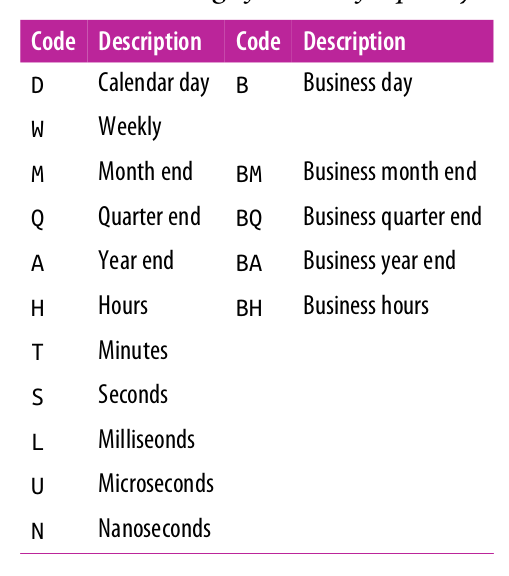

The monthly, quarterly, and annual frequencies are all marked at the end of the speci‐
fied period. Adding an S suffix to any of these marks it instead at the beginning

Code Description


MS   Month start

BMS  Business month start

QS   Quarter start

BQS  Business quarter start

AS   Year start

BAS  Business year start

Additionally, you can change the month used to mark any quarterly or annual code
by adding a three-letter month code as a suffix:
• Q-JAN , BQ-FEB , QS-MAR , BQS-APR , etc.
• A-JAN , BA-FEB , AS-MAR , BAS-APR , etc.
In the same way, you can modify the split-point of the weekly frequency by adding a
three-letter weekday code:
• W-SUN , W-MON , W-TUE , W-WED , etc.
On top of this, codes can be combined with numbers to specify other frequencies. For
example, for a frequency of 2 hours 30 minutes, we can combine the hour ( H ) and
minute ( T ) codes as follows:


In [53]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

# Thank You